In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:

'''from google.colab import drive
drive.mount('/content/drive')
'''

"from google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data_mobile_price_range.csv to data_mobile_price_range.csv


In [ ]:
import pandas as pd



In [ ]:

df = pd.read_csv(list(uploaded.keys())[0])


df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:

duplicated_values_count = len(df[df.duplicated()])

print("Number of duplicated values:", duplicated_values_count)

Number of duplicated values: 0


<Axes: >

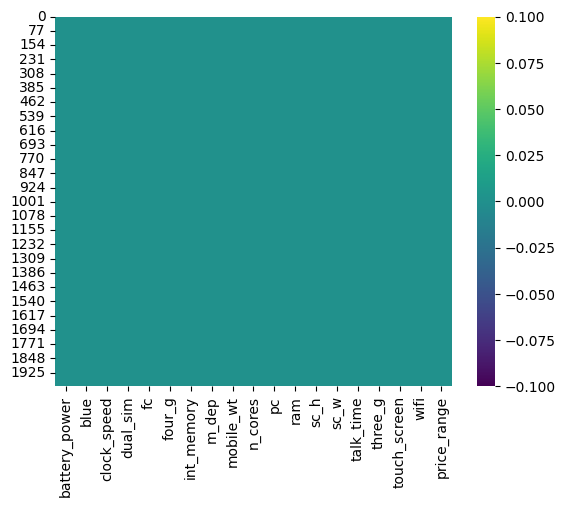

In [ ]:

sns.heatmap(df.isnull(), cmap='viridis', cbar=True)

In [ ]:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for battery_power: [ 842 1021  563 ... 1139 1467  858]
Unique values for blue: [0 1]
Unique values for clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values for dual_sim: [0 1]
Unique values for fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values for four_g: [0 1]
Unique values for int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values for m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values for mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  

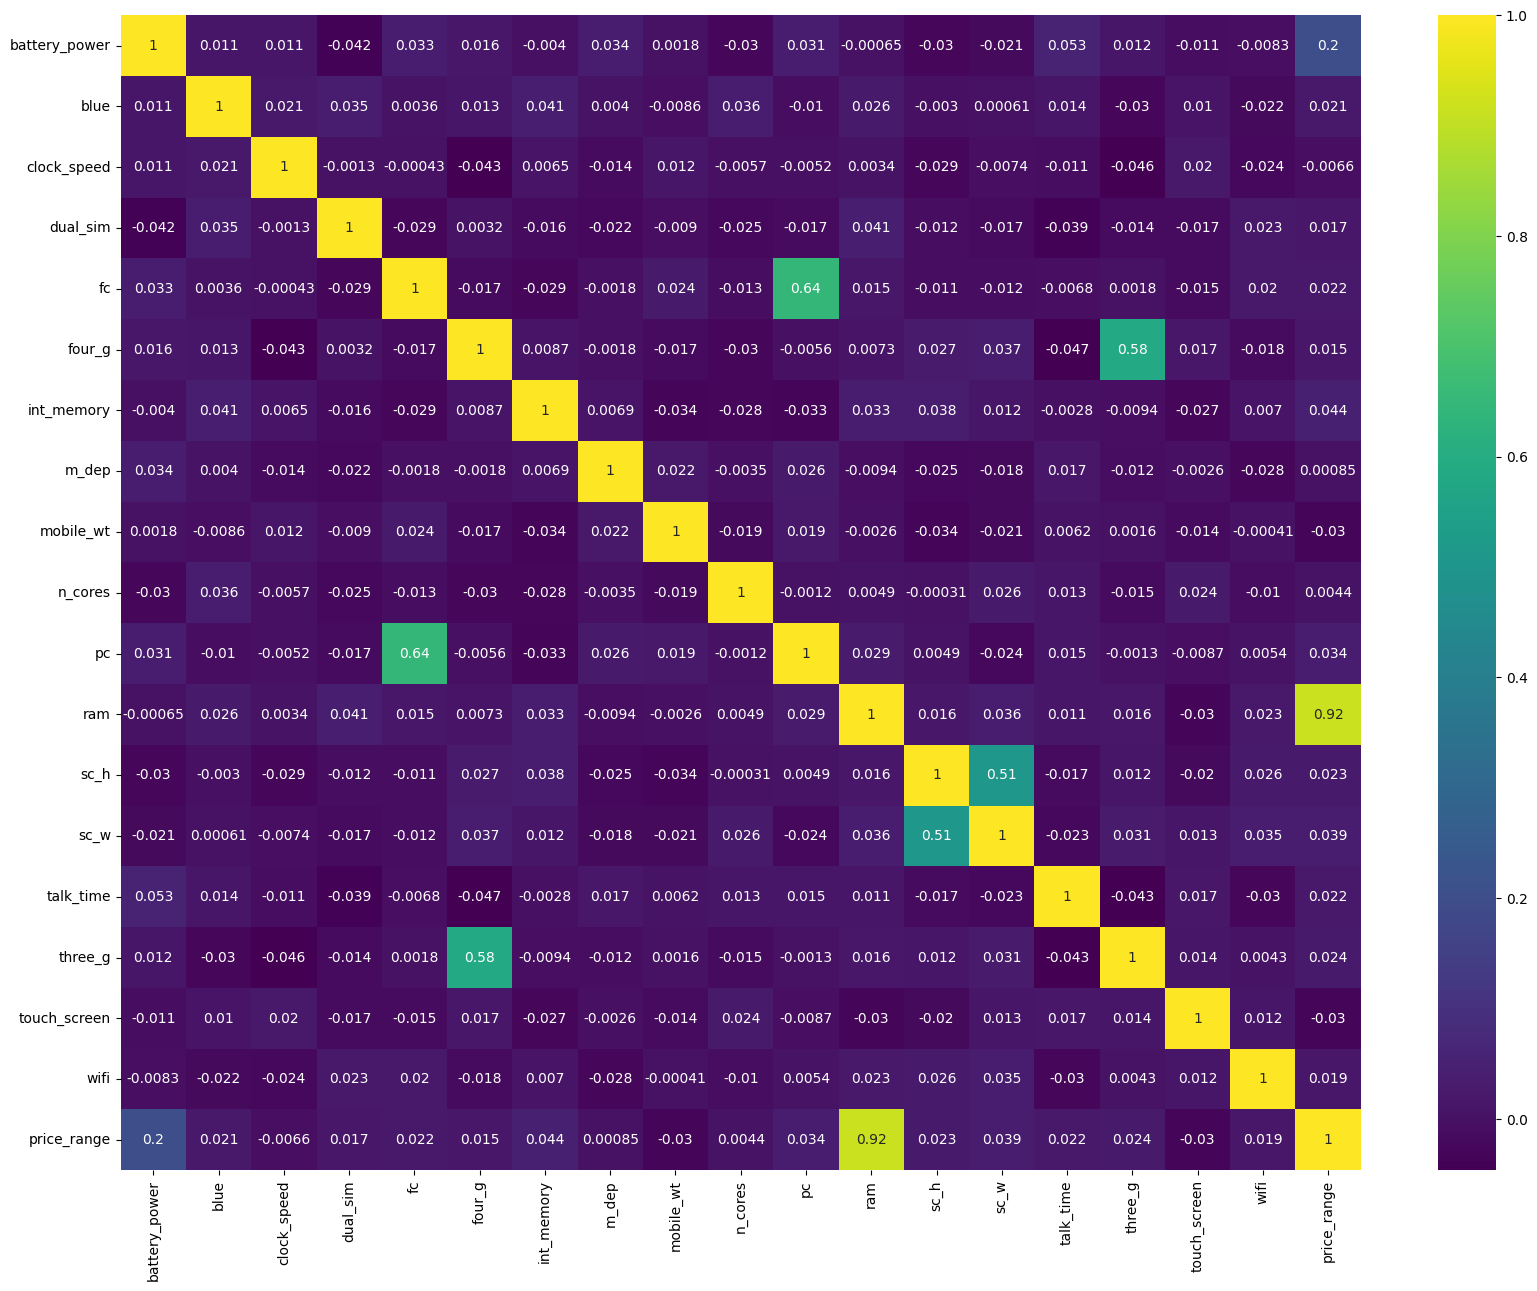

In [ ]:

correlation = df.corr()

plt.figure(figsize=[20, 15])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

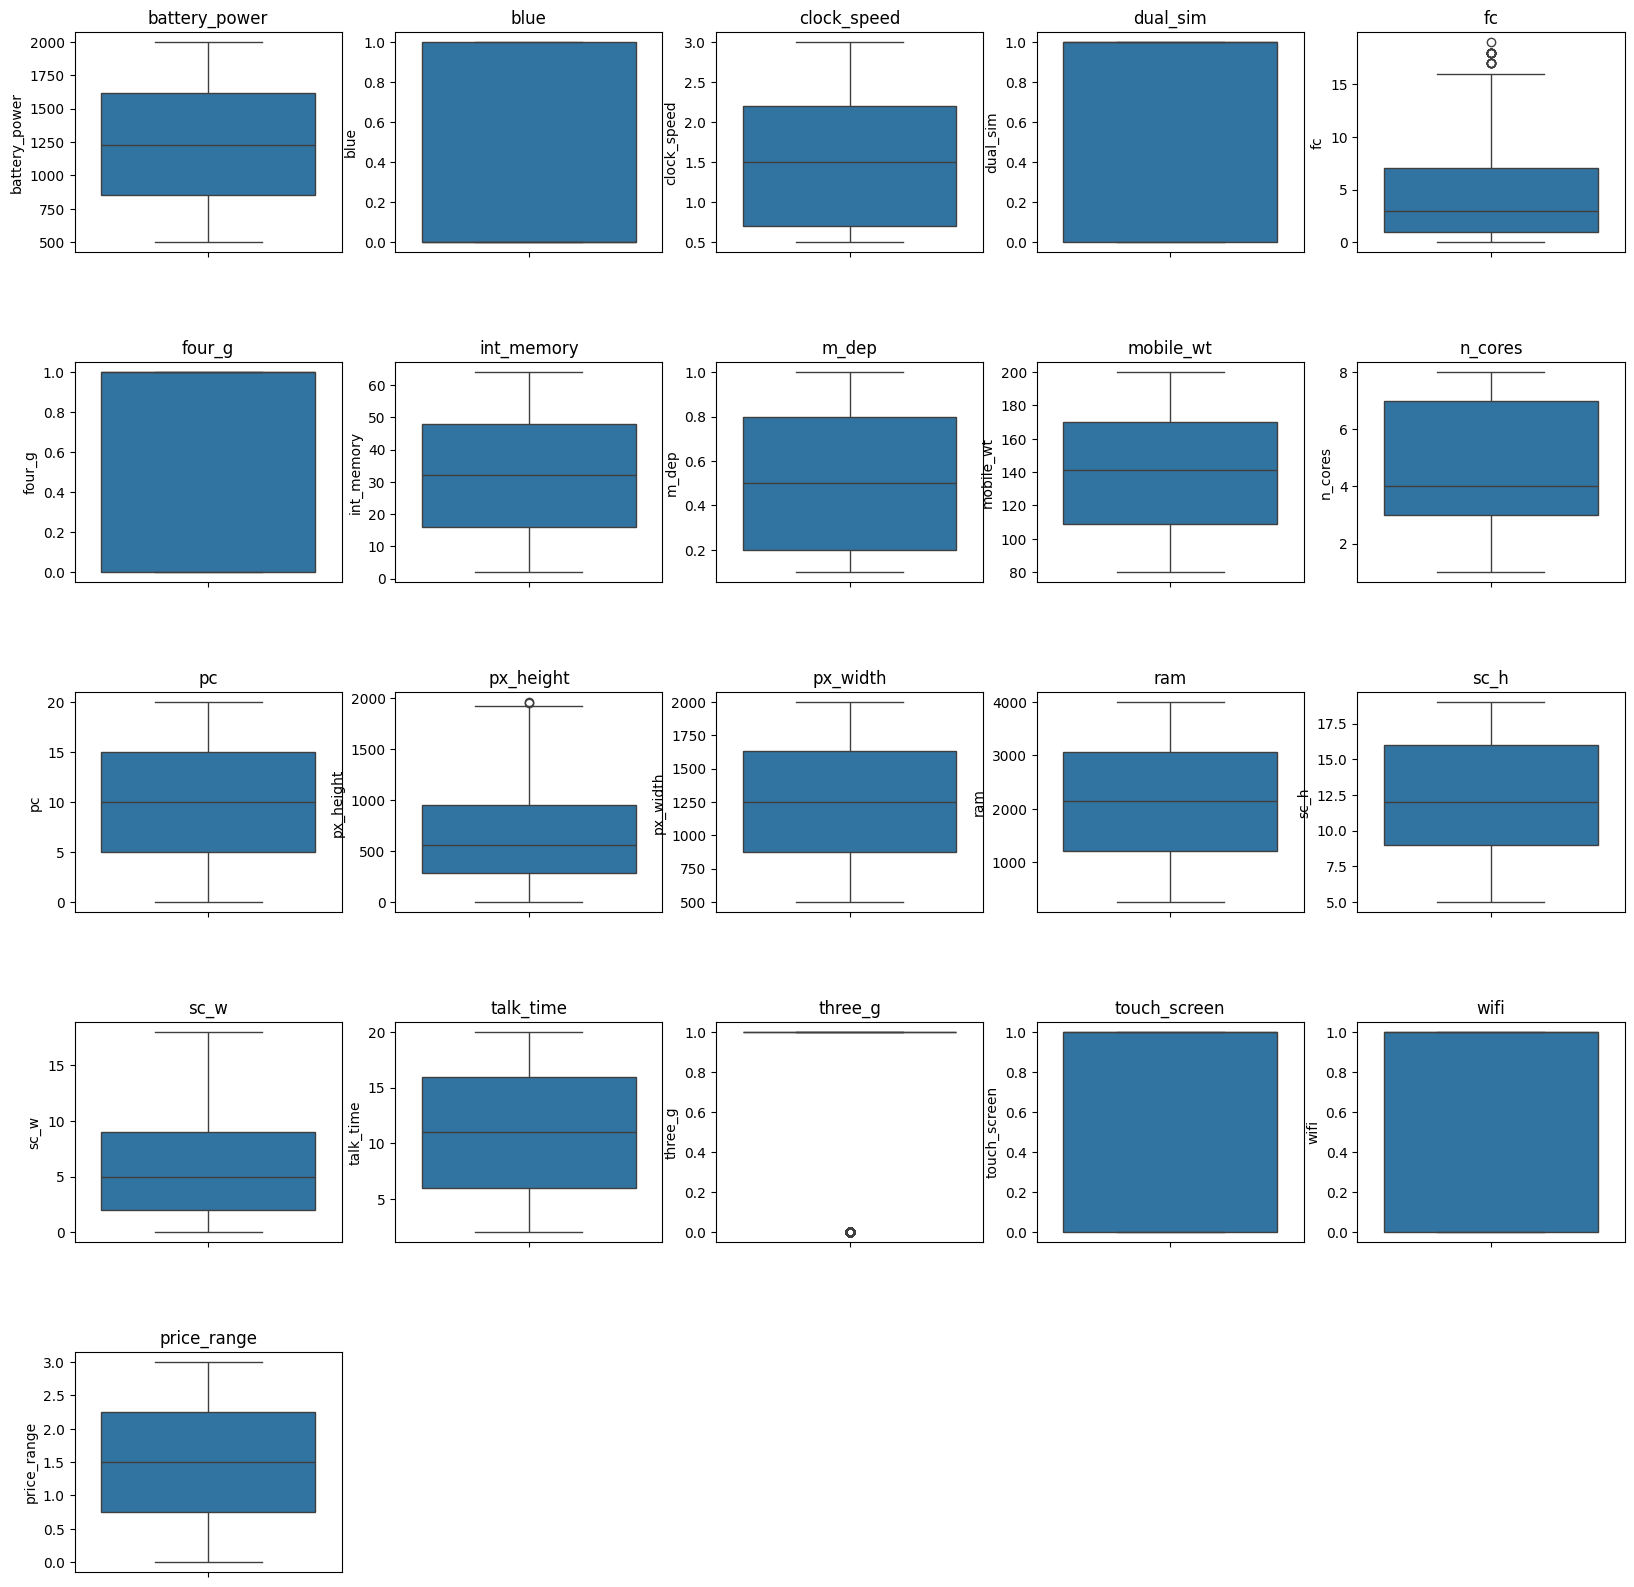

In [ ]:
plt.figure(figsize=(20,20))


for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  plt.subplot(5,5,index+1)


  sns.boxplot(df[item])


  plt.title(item)


  plt.subplots_adjust(hspace=0.5)


print("\n")


In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [ ]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape

(1600, 20)

In [ ]:
y_train.shape

(1600,)

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.95      0.91      0.92        95
           2       0.84      0.91      0.87        85
           3       0.96      0.95      0.96       114

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

[[105   0   0   0]
 [  1  86   4   0]
 [  0   9  77   6]
 [  0   0   4 108]]


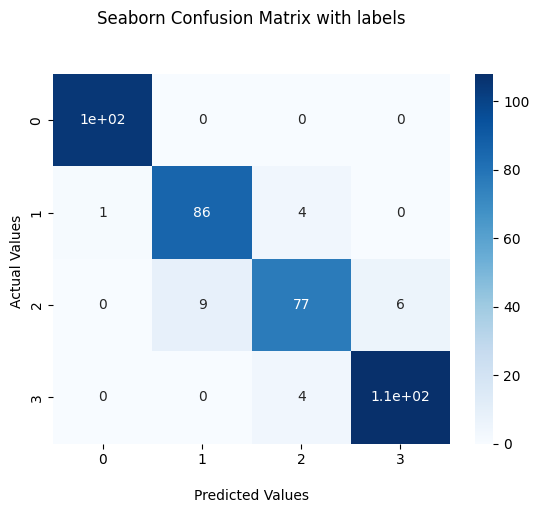

In [ ]:


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)




y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)




from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))



import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

plt.show()

In [ ]:


from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       377
           1       0.57      0.58      0.57       402
           2       0.52      0.53      0.53       403
           3       0.75      0.69      0.72       418

    accuracy                           0.65      1600
   macro avg       0.65      0.65      0.65      1600
weighted avg       0.65      0.65      0.65      1600



In [ ]:


from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))
lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(X_scaled, y)

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))


Cross-validation scores: [0.8    0.825  0.83   0.8125 0.815 ]
Average cross-validation score: 0.8164999999999999
Best cross-validation score: 0.8225
Best parameters: {'C': 10}
Test set score: 0.28


In [ ]:


from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')


y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)


Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       105
           1       0.75      0.71      0.73        91
           2       0.60      0.70      0.65        92
           3       0.87      0.76      0.81       112

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.78      0.78       400



In [ ]:


score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)


Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       395
           1       0.99      0.98      0.98       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


xgb = XGBClassifier()

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}


grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

y_pred_test = grid_search.predict(X_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Cross-validation score: 0.8143750000000001
Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.75      0.77      0.76        91
           2       0.65      0.72      0.68        92
           3       0.88      0.78      0.82       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.80      0.80       400



[[96  9  0  0]
 [10 70 11  0]
 [ 0 14 66 12]
 [ 0  0 25 87]]


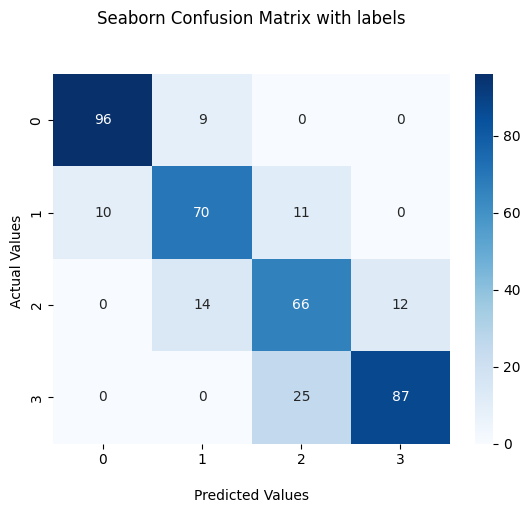

In [ ]:

import seaborn as sns
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])


plt.show()

In [ ]:


score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       395
           1       0.99      0.98      0.98       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [ ]:

from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       105
           1       0.78      0.76      0.77        91
           2       0.65      0.74      0.69        92
           3       0.88      0.79      0.83       112

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



[[98  7  0  0]
 [ 9 69 13  0]
 [ 0 12 68 12]
 [ 0  0 24 88]]


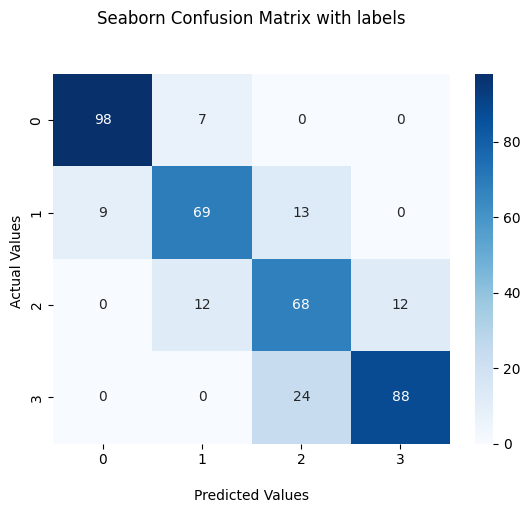

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

plt.show()

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.496756
1,battery_power,0.088604
2,mobile_wt,0.050369
3,int_memory,0.046902
4,talk_time,0.037822


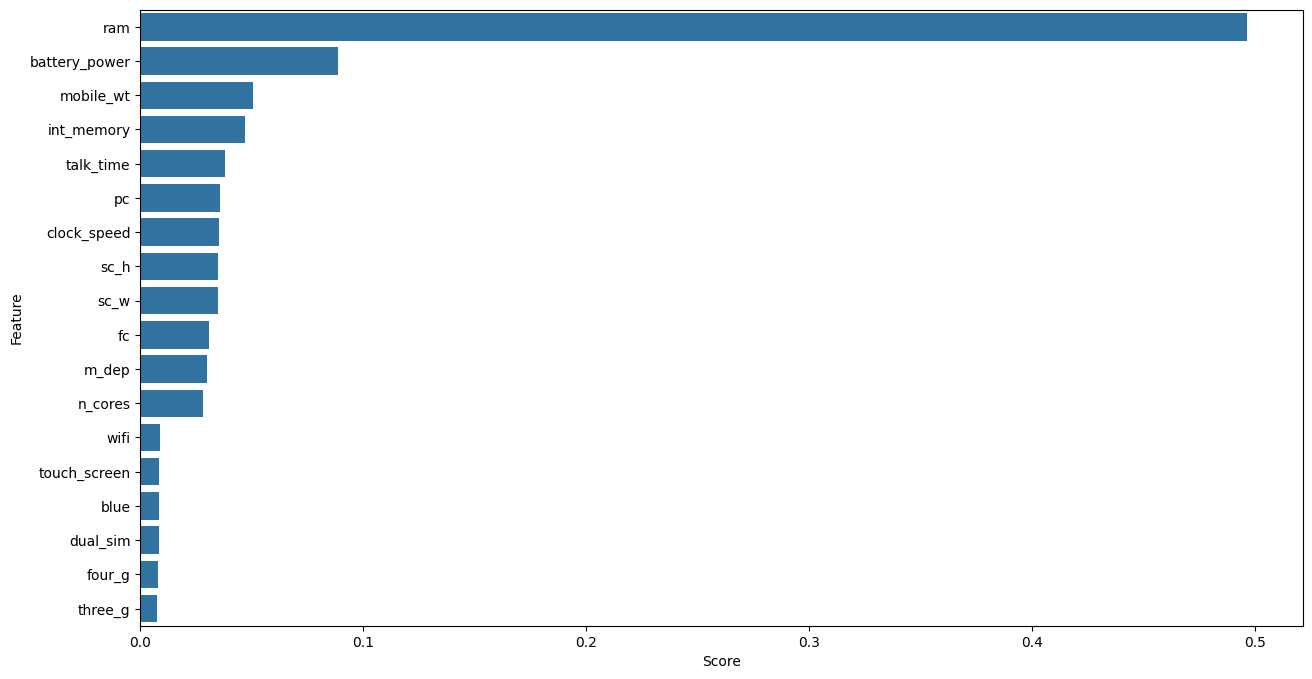

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

In [ ]:


from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)



In [ ]:
clsr.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
clsr.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_split': 6,
 'n_estimators': 200}

In [ ]:
clsr.best_estimator_
clsr.best_score_

0.8099981540761151

[[98  7  0  0]
 [ 9 69 13  0]
 [ 0 12 68 12]
 [ 0  0 24 88]]


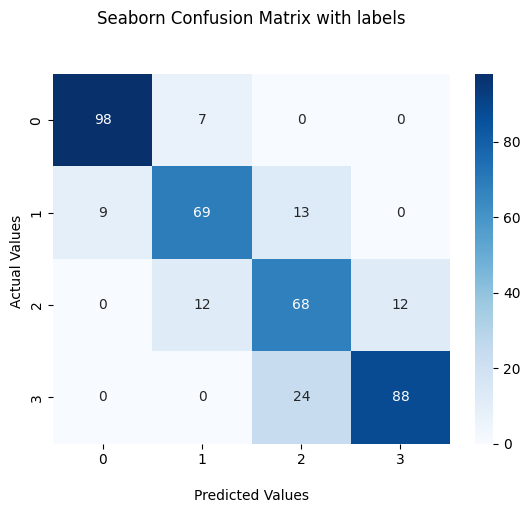

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:

y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.9

In [ ]:
print(classification_report(y_train, y_pred))

y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       395
           1       0.87      0.85      0.86       409
           2       0.88      0.84      0.86       408
           3       0.93      0.94      0.94       388

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



0.81

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       105
           1       0.79      0.75      0.77        91
           2       0.66      0.71      0.68        92
           3       0.87      0.81      0.84       112

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



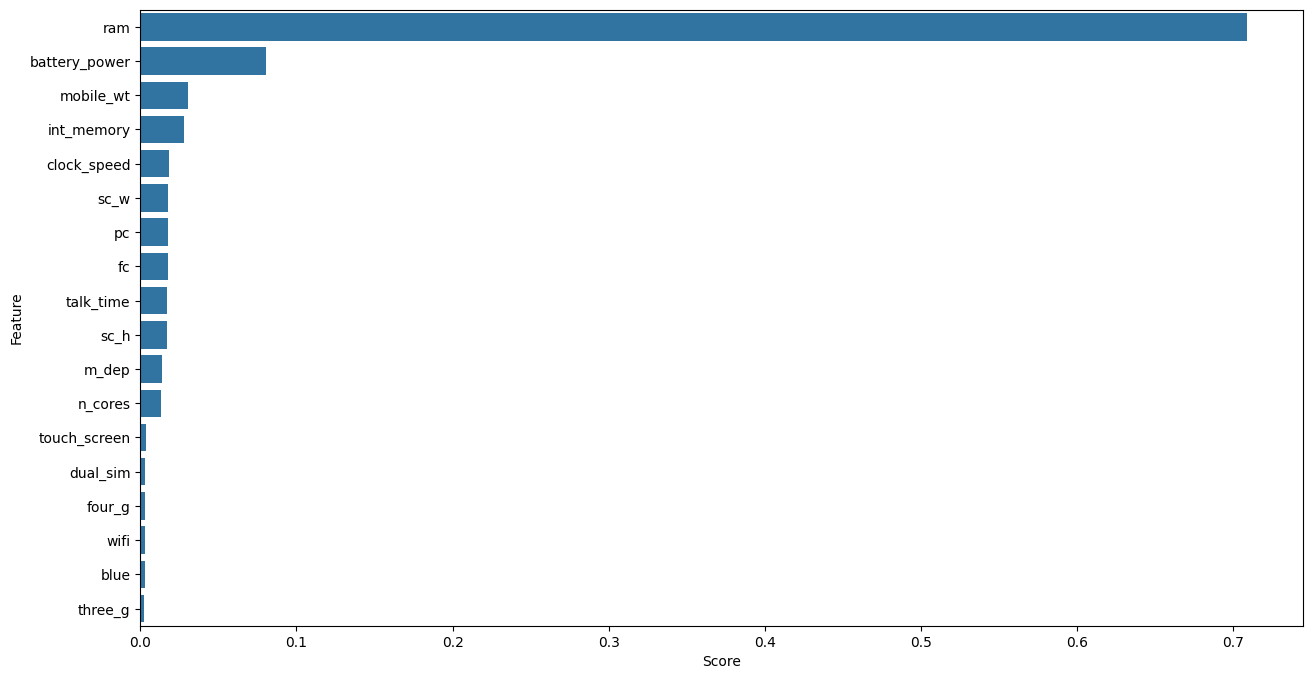

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()